In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from IPython.display import Image

#SK-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
#Scalers
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#PCA
from sklearn.decomposition import PCA
#Modelos
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
expo = pd.read_csv('acero-exportaciones-series.csv')
impo = pd.read_csv('acero-importaciones-series.csv')
prod = pd.read_csv('acero-produccion-series.csv')
cons = pd.read_csv('acero-consumo-series.csv')
tcrm_bcra=pd.read_excel('ITCRMSerie.xls')

# Preprocesamiento de datos

In [3]:
tcrm_bcra_index=tcrm_bcra.loc[tcrm_bcra['Unnamed: 0'] == 'Período']

tcrm_bcra_index

,Unnamed: 0,Índices con base 17-12-15=100,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Período,ITCRM,ITCRB Brasil,ITCRB Canadá,ITCRB Chile,ITCRB Estados Unidos,ITCRB México,ITCRB Uruguay,ITCRB China,ITCRB India,ITCRB Japón,ITCRB Reino Unido,ITCRB Suiza,ITCRB Zona Euro,ITCRB Vietnam,ITCRB Sudamérica*,Mes de referencia


In [4]:
tcrm_bcra=tcrm_bcra.drop(tcrm_bcra.index[[8699,8698,8697]])
tcrm_bcra

,Unnamed: 0,Índices con base 17-12-15=100,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Período,ITCRM,ITCRB Brasil,ITCRB Canadá,ITCRB Chile,ITCRB Estados Unidos,ITCRB México,ITCRB Uruguay,ITCRB China,ITCRB India,ITCRB Japón,ITCRB Reino Unido,ITCRB Suiza,ITCRB Zona Euro,ITCRB Vietnam,ITCRB Sudamérica*,Mes de referencia
1,1997-01-01 00:00:00,86.348,120.242,75.9954,92.2221,70.2782,73.9953,75.9724,58.4235,55.4918,30.6792,83.8864,71.5263,88.8509,63.2183,96.1453,1997-01-31 00:00:00
2,1997-01-02 00:00:00,86.3331,120.257,75.8069,92.3541,70.2728,73.7543,76.0094,58.4496,55.3291,30.7841,82.8572,71.5018,88.8678,63.1866,96.207,1997-01-31 00:00:00
3,1997-01-03 00:00:00,86.0561,120.262,75.7073,92.2032,70.2665,74.1226,76.0465,58.4751,55.3747,30.6557,82.8827,70.8812,87.9452,63.1748,96.1705,1997-01-31 00:00:00
4,1997-01-04 00:00:00,86.0622,120.289,75.7014,92.2046,70.2602,74.1721,76.0836,58.5005,55.3664,30.6612,82.8592,70.8781,87.9407,63.18,96.1925,1997-01-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,2020-10-18 00:00:00,118.385,96.2556,133.092,117.497,127.316,114.551,119.255,128.499,129.216,158.1,110.381,128.025,133.633,132.511,111.002,2020-10-31 00:00:00
8693,2020-10-19 00:00:00,118.894,97.1888,133.274,118.888,127.275,114.202,119.504,128.705,129.172,157.996,110.81,128.781,134.293,132.478,111.86,2020-10-31 00:00:00
8694,2020-10-20 00:00:00,119.205,97.6966,133.79,118.842,127.3,114.928,119.774,128.81,129.05,158.019,110.629,129.198,134.931,132.438,112.104,2020-10-31 00:00:00
8695,2020-10-21 00:00:00,119.133,96.7658,133.674,119.604,127.276,114.919,119.834,129.245,128.842,159.477,112.516,129.497,135.322,132.443,112.068,2020-10-31 00:00:00


In [5]:
tcrm_bcra=tcrm_bcra.rename(columns=tcrm_bcra.iloc[0])
tcrm_bcra=tcrm_bcra.drop(tcrm_bcra.index[0])
tcrm_bcra.head()

,Período,ITCRM,ITCRB Brasil,ITCRB Canadá,ITCRB Chile,ITCRB Estados Unidos,ITCRB México,ITCRB Uruguay,ITCRB China,ITCRB India,ITCRB Japón,ITCRB Reino Unido,ITCRB Suiza,ITCRB Zona Euro,ITCRB Vietnam,ITCRB Sudamérica*,Mes de referencia
1,1997-01-01 00:00:00,86.348,120.242,75.9954,92.2221,70.2782,73.9953,75.9724,58.4235,55.4918,30.6792,83.8864,71.5263,88.8509,63.2183,96.1453,1997-01-31 00:00:00
2,1997-01-02 00:00:00,86.3331,120.257,75.8069,92.3541,70.2728,73.7543,76.0094,58.4496,55.3291,30.7841,82.8572,71.5018,88.8678,63.1866,96.207,1997-01-31 00:00:00
3,1997-01-03 00:00:00,86.0561,120.262,75.7073,92.2032,70.2665,74.1226,76.0465,58.4751,55.3747,30.6557,82.8827,70.8812,87.9452,63.1748,96.1705,1997-01-31 00:00:00
4,1997-01-04 00:00:00,86.0622,120.289,75.7014,92.2046,70.2602,74.1721,76.0836,58.5005,55.3664,30.6612,82.8592,70.8781,87.9407,63.18,96.1925,1997-01-31 00:00:00
5,1997-01-05 00:00:00,86.0683,120.317,75.6954,92.2061,70.2539,74.2218,76.1207,58.5259,55.358,30.6666,82.8356,70.8749,87.9361,63.1851,96.2145,1997-01-31 00:00:00


In [6]:
tcrm_bcra.isnull().any()

Período                 False
ITCRM                   False
ITCRB Brasil            False
ITCRB Canadá            False
ITCRB Chile             False
ITCRB Estados Unidos    False
ITCRB México            False
ITCRB Uruguay           False
ITCRB China             False
ITCRB India             False
ITCRB Japón             False
ITCRB Reino Unido       False
ITCRB Suiza             False
ITCRB Zona Euro         False
ITCRB Vietnam           False
ITCRB Sudamérica*       False
Mes de referencia       False
dtype: bool

In [7]:
# Agrupamos por fecha para poder trabajar con los datos (No de manera anual, para mantener volumen) #
tcrm_bcra.Período=pd.to_datetime(tcrm_bcra.Período)
tcrm_bcra['date']= tcrm_bcra.Período.dt.date
tcrm_bcra=tcrm_bcra.drop("Período",axis=1)
tcrm_bcra=tcrm_bcra.drop("Mes de referencia",axis=1)
tcrm_bcra.head()

,ITCRM,ITCRB Brasil,ITCRB Canadá,ITCRB Chile,ITCRB Estados Unidos,ITCRB México,ITCRB Uruguay,ITCRB China,ITCRB India,ITCRB Japón,ITCRB Reino Unido,ITCRB Suiza,ITCRB Zona Euro,ITCRB Vietnam,ITCRB Sudamérica*,date
1,86.348,120.242,75.9954,92.2221,70.2782,73.9953,75.9724,58.4235,55.4918,30.6792,83.8864,71.5263,88.8509,63.2183,96.1453,1997-01-01
2,86.3331,120.257,75.8069,92.3541,70.2728,73.7543,76.0094,58.4496,55.3291,30.7841,82.8572,71.5018,88.8678,63.1866,96.207,1997-01-02
3,86.0561,120.262,75.7073,92.2032,70.2665,74.1226,76.0465,58.4751,55.3747,30.6557,82.8827,70.8812,87.9452,63.1748,96.1705,1997-01-03
4,86.0622,120.289,75.7014,92.2046,70.2602,74.1721,76.0836,58.5005,55.3664,30.6612,82.8592,70.8781,87.9407,63.18,96.1925,1997-01-04
5,86.0683,120.317,75.6954,92.2061,70.2539,74.2218,76.1207,58.5259,55.358,30.6666,82.8356,70.8749,87.9361,63.1851,96.2145,1997-01-05


In [8]:
# Necesitamos transformar valores a int para poder trabajar comodamente con ellos #
tcrm_bcra[["ITCRM ","ITCRB Brasil",'ITCRB Canadá','ITCRB Chile','ITCRB Estados Unidos','ITCRB México','ITCRB Uruguay','ITCRB China','ITCRB India','ITCRB Japón','ITCRB Reino Unido','ITCRB Suiza','ITCRB Zona Euro','ITCRB Vietnam','ITCRB Sudamérica*']] = tcrm_bcra[["ITCRM ","ITCRB Brasil",'ITCRB Canadá','ITCRB Chile','ITCRB Estados Unidos','ITCRB México','ITCRB Uruguay','ITCRB China','ITCRB India','ITCRB Japón','ITCRB Reino Unido','ITCRB Suiza','ITCRB Zona Euro','ITCRB Vietnam','ITCRB Sudamérica*']].astype(int)

In [9]:
tcrm_bcra.dtypes

ITCRM                    int32
ITCRB Brasil             int32
ITCRB Canadá             int32
ITCRB Chile              int32
ITCRB Estados Unidos     int32
ITCRB México             int32
ITCRB Uruguay            int32
ITCRB China              int32
ITCRB India              int32
ITCRB Japón              int32
ITCRB Reino Unido        int32
ITCRB Suiza              int32
ITCRB Zona Euro          int32
ITCRB Vietnam            int32
ITCRB Sudamérica*        int32
date                    object
dtype: object

In [10]:
tcrm_bcra_by_date=tcrm_bcra.groupby(['date']).mean()
tcrm_bcra_by_date.tail(10)

,ITCRM,ITCRB Brasil,ITCRB Canadá,ITCRB Chile,ITCRB Estados Unidos,ITCRB México,ITCRB Uruguay,ITCRB China,ITCRB India,ITCRB Japón,ITCRB Reino Unido,ITCRB Suiza,ITCRB Zona Euro,ITCRB Vietnam,ITCRB Sudamérica*
date,,,,,,,,,,,,,,,
2020-10-13,119,97,134,117,127,113,120,128,129,158,111,128,134,133,111
2020-10-14,119,97,134,117,127,114,120,128,129,159,111,128,134,132,111
2020-10-15,118,97,132,116,127,113,120,128,129,158,110,128,133,132,111
2020-10-16,118,96,133,117,127,114,119,128,129,158,110,128,133,132,111
2020-10-17,118,96,133,117,127,114,119,128,129,158,110,128,133,132,111
2020-10-18,118,96,133,117,127,114,119,128,129,158,110,128,133,132,111
2020-10-19,118,97,133,118,127,114,119,128,129,157,110,128,134,132,111
2020-10-20,119,97,133,118,127,114,119,128,129,158,110,129,134,132,112
2020-10-21,119,96,133,119,127,114,119,129,128,159,112,129,135,132,112


In [11]:
expo.isnull().any()

indice_tiempo        False
acero_moldeado       False
laminados_largos     False
laminados_planos     False
rieles               False
tubos_con_costura    False
tubos_sin_costura    False
dtype: bool

In [12]:
prod.isnull().any()

indice_tiempo       False
acero_produccion    False
dtype: bool

In [13]:
impo.isnull().any()

indice_tiempo        False
acero_moldeado       False
barras_forjadas      False
laminados_largos     False
laminados_planos     False
rieles               False
tubos_con_costura    False
tubos_sin_costura    False
dtype: bool

In [14]:
cons.isnull().any()

indice_tiempo        False
laminados_largos     False
laminados_planos     False
tubos_sin_costura    False
dtype: bool

In [15]:
# Como dijimos antes, agrupo distintos data frames por fecha #
expo.indice_tiempo = pd.to_datetime(expo.indice_tiempo)
expo['date'] = expo.indice_tiempo.dt.date                                
expo.head()

,indice_tiempo,acero_moldeado,laminados_largos,laminados_planos,rieles,tubos_con_costura,tubos_sin_costura,date
0,1992-01-01,0.0,4.1,31.4,10.8,3.8,109.3,1992-01-01
1,1992-04-01,0.0,25.1,57.5,20.5,1.6,125.8,1992-04-01
2,1992-07-01,0.0,21.7,69.8,28.6,1.4,61.8,1992-07-01
3,1992-10-01,0.0,10.1,65.2,14.8,4.3,173.9,1992-10-01
4,1993-01-01,0.0,19.1,136.9,1.4,7.0,105.5,1993-01-01


In [16]:
expo_by_date = expo.groupby(["date"]).sum()
expo_by_date.head()

,acero_moldeado,laminados_largos,laminados_planos,rieles,tubos_con_costura,tubos_sin_costura
date,,,,,,
1992-01-01,0.0,4.1,31.4,10.8,3.8,109.3
1992-04-01,0.0,25.1,57.5,20.5,1.6,125.8
1992-07-01,0.0,21.7,69.8,28.6,1.4,61.8
1992-10-01,0.0,10.1,65.2,14.8,4.3,173.9
1993-01-01,0.0,19.1,136.9,1.4,7.0,105.5


In [17]:
impo.indice_tiempo = pd.to_datetime(impo.indice_tiempo) 
impo['date'] = expo.indice_tiempo.dt.date
impo.head()

,indice_tiempo,acero_moldeado,barras_forjadas,laminados_largos,laminados_planos,rieles,tubos_con_costura,tubos_sin_costura,date
0,1992-01-01,0.0,0.0,17.7,259.9,0.1,4.0,1.1,1992-01-01
1,1992-04-01,0.0,0.0,19.4,246.8,0.0,1.2,3.1,1992-04-01
2,1992-07-01,0.0,0.0,24.9,228.7,0.1,3.2,1.8,1992-07-01
3,1992-10-01,0.0,0.0,25.5,174.6,0.1,4.1,1.2,1992-10-01
4,1993-01-01,0.0,0.0,20.8,112.9,0.0,2.1,1.0,1993-01-01


In [18]:
impo_by_date = impo.groupby(["date"]).sum()
impo_by_date.head()

,acero_moldeado,barras_forjadas,laminados_largos,laminados_planos,rieles,tubos_con_costura,tubos_sin_costura
date,,,,,,,
1992-01-01,0.0,0.0,17.7,259.9,0.1,4.0,1.1
1992-04-01,0.0,0.0,19.4,246.8,0.0,1.2,3.1
1992-07-01,0.0,0.0,24.9,228.7,0.1,3.2,1.8
1992-10-01,0.0,0.0,25.5,174.6,0.1,4.1,1.2
1993-01-01,0.0,0.0,20.8,112.9,0.0,2.1,1.0


In [19]:
cons.indice_tiempo =   pd.to_datetime(cons.indice_tiempo)
cons['date'] =  cons.indice_tiempo.dt.date
cons_by_date = cons.groupby(["date"]).sum() 
cons_by_date.head()

,laminados_largos,laminados_planos,tubos_sin_costura
date,,,
2008-01-01,438,801,65
2008-04-01,524,787,84
2008-07-01,465,639,52
2008-10-01,423,463,29
2009-01-01,426,288,11


In [20]:
prod.indice_tiempo =   pd.to_datetime(prod.indice_tiempo)
prod['date'] =  prod.indice_tiempo.dt.date
prod_by_date = prod.groupby(["date"]).sum()
prod_by_date["acero_produccion"]=prod_by_date["acero_produccion"]/1000
prod_by_date.head()  

,acero_produccion
date,
1993-01-01,214.5
1993-02-01,169.0
1993-03-01,238.7
1993-04-01,250.2
1993-05-01,261.2


In [21]:
# Para cada dataframe creamos una columna que tenga los datos totales #

In [22]:
expo_by_date_total = expo_by_date["laminados_largos"] + expo_by_date["laminados_planos"]+expo_by_date["rieles"]+expo_by_date["tubos_con_costura"]+expo_by_date["tubos_sin_costura"]
expo_by_date["Suma total exportaciones"] = expo_by_date_total
expo_by_date.head()

,acero_moldeado,laminados_largos,laminados_planos,rieles,tubos_con_costura,tubos_sin_costura,Suma total exportaciones
date,,,,,,,
1992-01-01,0.0,4.1,31.4,10.8,3.8,109.3,159.4
1992-04-01,0.0,25.1,57.5,20.5,1.6,125.8,230.5
1992-07-01,0.0,21.7,69.8,28.6,1.4,61.8,183.3
1992-10-01,0.0,10.1,65.2,14.8,4.3,173.9,268.3
1993-01-01,0.0,19.1,136.9,1.4,7.0,105.5,269.9


In [23]:
impo_by_date_total = impo_by_date["laminados_largos"] + impo_by_date["laminados_planos"]+impo_by_date["rieles"]+impo_by_date["tubos_con_costura"]+impo_by_date["tubos_sin_costura"]
impo_by_date["Suma total importaciones"] = impo_by_date_total
impo_by_date.head()

,acero_moldeado,barras_forjadas,laminados_largos,laminados_planos,rieles,tubos_con_costura,tubos_sin_costura,Suma total importaciones
date,,,,,,,,
1992-01-01,0.0,0.0,17.7,259.9,0.1,4.0,1.1,282.8
1992-04-01,0.0,0.0,19.4,246.8,0.0,1.2,3.1,270.5
1992-07-01,0.0,0.0,24.9,228.7,0.1,3.2,1.8,258.7
1992-10-01,0.0,0.0,25.5,174.6,0.1,4.1,1.2,205.5
1993-01-01,0.0,0.0,20.8,112.9,0.0,2.1,1.0,136.8


In [24]:
cons_by_date_total = cons_by_date["tubos_sin_costura"] + cons_by_date["laminados_planos"]+cons_by_date["laminados_largos"]
cons_by_date["Suma total consumo"]=cons_by_date_total
cons_by_date.head()

,laminados_largos,laminados_planos,tubos_sin_costura,Suma total consumo
date,,,,
2008-01-01,438,801,65,1304
2008-04-01,524,787,84,1395
2008-07-01,465,639,52,1156
2008-10-01,423,463,29,915
2009-01-01,426,288,11,725


In [25]:
# Juntamos todo en un dataframe #

In [26]:
consumoimpo_by_date = pd.merge(cons_by_date,impo_by_date, how='left',left_index = True,  right_index = True)
consumoimpoexpo_by_date = pd.merge(consumoimpo_by_date,expo_by_date, how='left',left_index = True,  right_index = True)
consumoimpoexpoprod_by_date = pd.merge(consumoimpoexpo_by_date,prod_by_date, how='left',left_index = True,  right_index = True)
consumoimpoexpoprod_by_date.head()

,laminados_largos_x,laminados_planos_x,tubos_sin_costura_x,Suma total consumo,acero_moldeado_x,barras_forjadas,laminados_largos_y,laminados_planos_y,rieles_x,tubos_con_costura_x,tubos_sin_costura_y,Suma total importaciones,acero_moldeado_y,laminados_largos,laminados_planos,rieles_y,tubos_con_costura_y,tubos_sin_costura,Suma total exportaciones,acero_produccion
date,,,,,,,,,,,,,,,,,,,,
2008-01-01,438,801,65,1304,0.0,0.0,55.3,129.6,1.1,25.9,13.1,225.0,0.0,34.8,28.0,0.0,5.6,140.0,208.4,417.0
2008-04-01,524,787,84,1395,0.0,0.0,92.5,144.8,4.5,21.0,8.8,271.6,0.0,43.1,53.4,0.0,36.6,165.8,298.9,501.0
2008-07-01,465,639,52,1156,0.0,0.0,51.5,99.6,1.3,16.6,8.2,177.2,0.0,46.5,42.4,0.0,21.9,210.6,321.4,528.7
2008-10-01,423,463,29,915,0.0,0.0,54.3,81.0,7.2,35.5,13.8,191.8,0.0,31.4,86.2,0.0,14.7,209.9,342.2,480.8
2009-01-01,426,288,11,725,0.0,0.0,23.1,53.8,2.5,29.1,7.6,116.1,0.0,17.9,152.8,0.0,16.1,111.4,298.2,284.2


In [27]:
# Formamos un dataframe con los totales de cada dataset #
Totales_by_date = consumoimpoexpoprod_by_date.groupby(["date"])["Suma total consumo", "Suma total importaciones","Suma total exportaciones","acero_produccion"].sum()
Totales_by_date.head()

C:\Users\Manuko\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Suma total consumo,Suma total importaciones,Suma total exportaciones,acero_produccion
date,,,,
2008-01-01,1304,225.0,208.4,417.0
2008-04-01,1395,271.6,298.9,501.0
2008-07-01,1156,177.2,321.4,528.7
2008-10-01,915,191.8,342.2,480.8
2009-01-01,725,116.1,298.2,284.2


In [28]:
# Creamos columna BALANZA COMERCIAL #

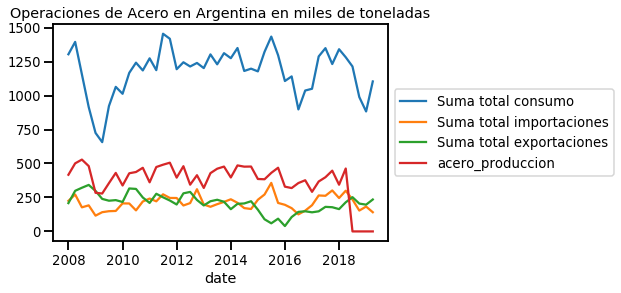

In [29]:
sns.set_context("talk", font_scale=0.8)
Totales_by_date.plot(title = "Operaciones de Acero en Argentina en miles de toneladas" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [30]:
Totales_by_date['balanza']=Totales_by_date['Suma total exportaciones']-Totales_by_date['Suma total importaciones']
Totales_by_date.head()

,Suma total consumo,Suma total importaciones,Suma total exportaciones,acero_produccion,balanza
date,,,,,
2008-01-01,1304,225.0,208.4,417.0,-16.6
2008-04-01,1395,271.6,298.9,501.0,27.3
2008-07-01,1156,177.2,321.4,528.7,144.2
2008-10-01,915,191.8,342.2,480.8,150.4
2009-01-01,725,116.1,298.2,284.2,182.1


In [31]:
# Previo a comenzar a utilizar los modelos reunimos todos los valores a utilizar en el mismo dataframe #
df = pd.merge(Totales_by_date,tcrm_bcra_by_date, how='left',left_index = True,  right_index = True)
df.head(46)

,Suma total consumo,Suma total importaciones,Suma total exportaciones,acero_produccion,balanza,ITCRM,ITCRB Brasil,ITCRB Canadá,ITCRB Chile,ITCRB Estados Unidos,ITCRB México,ITCRB Uruguay,ITCRB China,ITCRB India,ITCRB Japón,ITCRB Reino Unido,ITCRB Suiza,ITCRB Zona Euro,ITCRB Vietnam,ITCRB Sudamérica*
date,,,,,,,,,,,,,,,,,,,,
2008-01-01,1304,225.0,208.4,417.00,-16.6,159,196,183,163,130,168,109,108,124,113,161,130,178,105,156
2008-04-01,1395,271.6,298.9,501.00,27.3,156,188,165,175,122,163,111,108,116,119,150,136,178,106,158
2008-07-01,1156,177.2,321.4,528.70,144.2,146,188,153,135,112,151,108,100,99,105,139,124,165,99,143
2008-10-01,915,191.8,342.2,480.80,150.4,133,159,148,131,113,146,100,100,96,106,126,112,147,104,130
2009-01-01,725,116.1,298.2,284.20,182.1,132,145,136,124,118,128,96,106,100,136,111,127,157,105,122
2009-04-01,657,141.5,239.3,278.90,97.8,137,155,137,138,124,134,103,111,101,130,114,121,155,109,132
2009-07-01,923,148.8,226.0,355.33,77.2,149,183,152,148,124,141,107,110,110,132,131,130,165,109,146
2009-10-01,1064,150.7,230.3,430.65,79.6,150,193,155,140,121,132,115,108,113,139,123,129,164,107,149
2010-01-01,1013,206.3,216.6,338.10,10.3,143,187,150,141,113,131,118,100,112,126,118,122,151,99,148


In [32]:
# Como vamos a hacer predicción de la balanza comercial, debemos quitar " Suma de exportaciónes" o "Suma de importaciones" ya que estos conformaban dicha balanza #
df=df.drop(["Suma total exportaciones"],axis=1)

In [33]:
# No considero limpiar outliers, ya que tenemos pocos datos, de ser necesario en esta linea correria el siguiente codigo #

In [34]:
# Como dijimos buscaremos predecir el valor de balanza #

x = df.drop('balanza', axis = 1)
y = df["balanza"]

In [35]:
# Separamos set de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)
# Separamos el set X con las features polinomicas (el set Y ya fue separado en la linea anterior) 
x_poly_train, x_poly_test = train_test_split(x, test_size=0.25, random_state=1)

In [36]:
# Escalamos #
# Definimos el escalador 
scaler = MinMaxScaler()
# Fiteamos para los x_train
scaler = scaler.fit(x_train)

In [37]:
# Transformamos los x_train y x_test
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [38]:
# Vamos a utilizar PCA para optimizar la eficiencia del modelo #

n_comps = 10
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
x_train_scaled = pd.DataFrame(pca.fit_transform(x_train_scaled))
x_test_scaled = pd.DataFrame(pca.transform(x_test_scaled))


In [39]:
# Aqui estamos agregando las features polinomicas LUEGO de escalar los datos
grad_poly = 4
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_train_scaled)
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_test_scaled)

In [40]:
# Vamos a crear un dataframe para guardar los resultados de cada estimador
results_df = pd.DataFrame(columns=['Model','Features','R2','MSE','MAE'])

# Prueba de Modelos

# Linear Regression Linear

In [41]:
#Definimos el estimador
lr = LinearRegression()
#Definimos diccionario con hyperparametros
parameters_lr = {'fit_intercept' : [False, True]}
#Definimos la cantidad de folds para validar
n_folds = 7
#Definimos el objeto grid search con los parametros anteriores
gs_lin = GridSearchCV(lr, param_grid=parameters_lr, cv=n_folds, refit=True, scoring="neg_mean_squared_error")

In [42]:
#Entrenamos
gs_lin.fit(x_train_scaled, y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [False, True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [43]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs_lin.best_estimator_, "\n")
print(gs_lin.best_params_, "\n")
print(gs_lin.best_score_, "\n")

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False) 

{'fit_intercept': False} 

-3047.8411624380474 



In [44]:
# Usamos x_test para predecir con el mejor estimador
linear_prediction = gs_lin.best_estimator_.predict(x_test_scaled)
#Calculamos las metricas R2, MSE y MAE
linear_r2 = r2_score(y_true=y_test, y_pred=linear_prediction)
linear_mse = mean_squared_error(y_true=y_test, y_pred=linear_prediction)
linear_mae = mean_absolute_error(y_true=y_test, y_pred=linear_prediction)

R2 score: 0.581110
MAE: 2696.886650
MSE: 42.529977


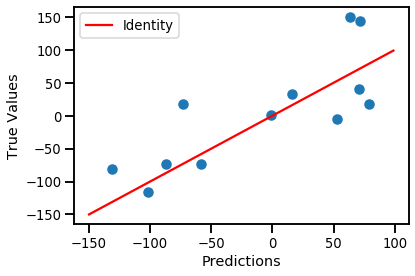

In [45]:
#Vamos a plotear Predictions vs True values
plt.scatter(linear_prediction, y_test)
plt.plot(np.arange(-150,100),np.arange(-150,100), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {linear_r2:.6f}')
print(f'MAE: {linear_mse:.6f}')
print(f'MSE: {linear_mae:.6f}')

In [46]:
results_df = results_df.append({'Model':'Linear',
                                'Features':'Lineal',
                                'R2':linear_r2,
                                'MSE':linear_mse,
                                'MAE':linear_mae},ignore_index=True)

# Linear Regression Polynomical

In [47]:
#Usamos los mismos parametros para este nuevo GS.
gs_pol = GridSearchCV(lr, param_grid=parameters_lr,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
#Entrenamos
gs_pol.fit(x_train_poly_scaled, y_train)
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs_pol.best_estimator_, "\n")
print(gs_pol.best_params_, "\n")
print(gs_pol.best_score_, "\n")

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False) 

{'fit_intercept': False} 

-3890.1483408213744 



In [48]:
# Predecimos para el set polinomico
poly_linear_prediction = gs_pol.best_estimator_.predict(x_test_poly_scaled)
# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test, y_pred=poly_linear_prediction)

R2 score: -0.337681
MAE: 8612.233667
MSE: 71.248828


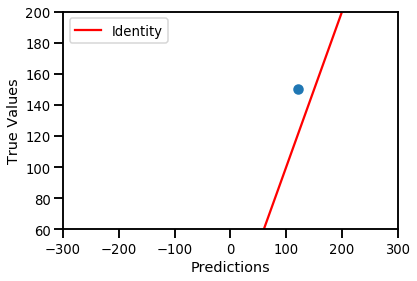

In [49]:
# Plot con 'zoom'
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(0,200),np.arange(0,200), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((-300,300))
plt.ylim((60,200))
plt.legend()
print(f'R2 score: {poly_linear_r2:.6f}')
print(f'MAE: {poly_linear_mse:.6f}')
print(f'MSE: {poly_linear_mae:.6f}')

In [50]:
results_df = results_df.append({'Model':'Linear',
                                'Features':'Poly',
                                'R2':poly_linear_r2,
                                'MSE':poly_linear_mse,
                                'MAE':poly_linear_mae},ignore_index=True)

# Ridge Regression Linear

In [51]:
# Ahora cambiamos el estimador, usaremos Ridge Regression
Rg = Ridge()
# Lista del parametro lambda (llamado 'alpha' en el GridSearch )
lambdas = [0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,1]
# Juntamos el diccionario de parametros
parameters_rg = {'alpha': lambdas}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs2_lin = GridSearchCV(Rg, param_grid=parameters_rg,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
# Entrenamos
gs2_lin.fit(x_train_scaled, y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [52]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs2_lin.best_estimator_, "\n")
print(gs2_lin.best_params_, "\n")
print(gs2_lin.best_score_, "\n")

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

{'alpha': 0.1} 

-2857.3973789200877 



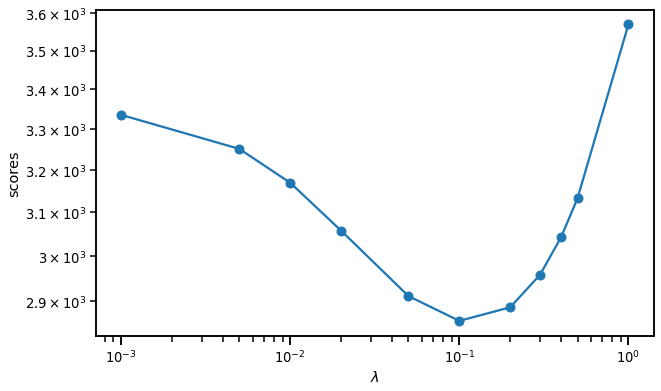

In [53]:
# Vamos a plotear nuestro parametro lambda vs. el score
fit_lambdas = [d['alpha'] for d in gs2_lin.cv_results_['params']]
fit_scores = gs2_lin.cv_results_['mean_test_score']
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

In [54]:
#Predicciones + Metricas
ridge_prediction = gs2_lin.best_estimator_.predict(x_test_scaled)
ridge_r2 = r2_score(y_true=y_test, y_pred=ridge_prediction)
ridge_mse = mean_squared_error(y_true=y_test, y_pred=ridge_prediction)
ridge_mae = mean_absolute_error(y_true=y_test, y_pred=ridge_prediction)

R2 score: 0.598866
MAE: 2582.573608
MSE: 40.320547


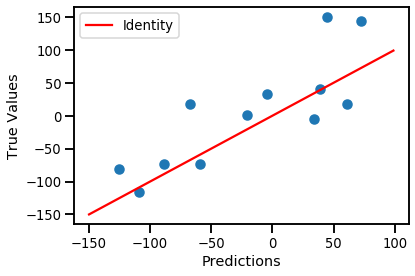

In [55]:
# Plots
plt.scatter(ridge_prediction, y_test)
plt.plot(np.arange(-150,100),np.arange(-150,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {ridge_r2:.6f}')
print(f'MAE: {ridge_mse:.6f}')
print(f'MSE: {ridge_mae:.6f}')

In [56]:
#Guardamos resultados
results_df = results_df.append({'Model':'Ridge',
                                'Features':'Lineal',
                                'R2':ridge_r2,
                                'MSE':ridge_mse,
                                'MAE':ridge_mae},ignore_index=True)

# Ridge regression Polynomical

In [57]:
#Definimos estimador
Rg = Ridge()
#Defini
gs2_pol = GridSearchCV(Rg, param_grid=parameters_rg,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
gs2_pol.fit(x_train_poly_scaled, y_train)
print(gs2_pol.best_estimator_, "\n")
print(gs2_pol.best_params_, "\n")
print(gs2_pol.best_score_, "\n")

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

{'alpha': 0.05} 

-1997.5336893368114 



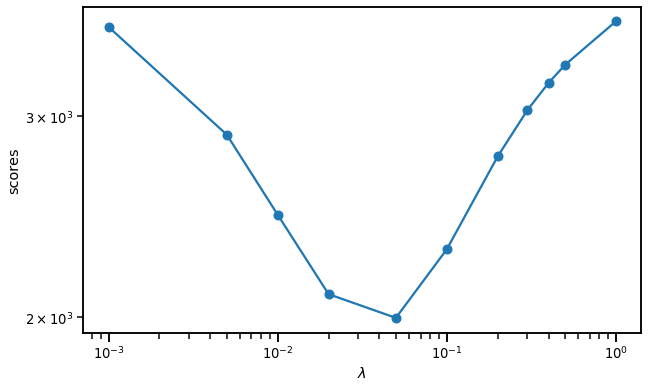

In [58]:
# Vamos a plotear nuestro parametro lambda vs el score
fit_lambdas = [d['alpha'] for d in gs2_pol.cv_results_['params']]
fit_scores = gs2_pol.cv_results_['mean_test_score']
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

R2 score: 0.571875
MAE: 2756.345177
MSE: 41.058552


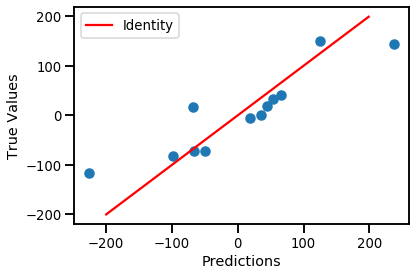

In [59]:
# Prediccion + Metricas
poly_ridge_prediction = gs2_pol.best_estimator_.predict(x_test_poly_scaled)
poly_ridge_r2 = r2_score(y_true=y_test, y_pred=poly_ridge_prediction)
poly_ridge_mse = mean_squared_error(y_true=y_test, y_pred=poly_ridge_prediction)
poly_ridge_mae = mean_absolute_error(y_true=y_test, y_pred=poly_ridge_prediction)
# Plots
plt.scatter(poly_ridge_prediction, y_test)
plt.plot(np.arange(-200,200),np.arange(-200,200), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_ridge_r2:.6f}')
print(f'MAE: {poly_ridge_mse:.6f}')
print(f'MSE: {poly_ridge_mae:.6f}')

In [60]:
# Guardamos
results_df = results_df.append({'Model':'Ridge',
                                'Features':'Poly',
                                'R2':poly_ridge_r2,
                                'MSE':poly_ridge_mse,
                                'MAE':poly_ridge_mae},ignore_index=True)

# Linear SVR

In [61]:
# Ahora cambiamos el estimador, usaremos SVR
svr = SVR(max_iter=25000)
# Lista del parametro lambda (parametro 'alpha')
parameters_svr = {'C' : [100,1000,1500,2000,3000,5000],
              'epsilon' : [0.001, 0.01, 0.1,1, 10,100],
             'gamma':[0.001, 0.01, 0.1,1, 10,100]}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs3_lin = GridSearchCV(svr, param_grid=parameters_svr,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [62]:
# Entrenamos
gs3_lin.fit(x_train_scaled, y_train)

Fitting 7 folds for each of 216 candidates, totalling 1512 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  31 tasks      | elapsed:    1.6s
[Parallel(n_jobs=3)]: Done 1512 out of 1512 | elapsed:    3.7s finished


GridSearchCV(cv=7, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=25000, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': [100, 1000, 1500, 2000, 3000, 5000],
                         'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [63]:
print(gs3_lin.best_estimator_, "\n")
print(gs3_lin.best_params_, "\n")
print(gs3_lin.best_score_, "\n")

SVR(C=1500, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=1,
    kernel='rbf', max_iter=25000, shrinking=True, tol=0.001, verbose=False) 

{'C': 1500, 'epsilon': 0.001, 'gamma': 1} 

-2337.3429315183125 



In [64]:
# Prediccion + Metricas
svr_prediction = gs3_lin.best_estimator_.predict(x_test_scaled)
svr_r2 = r2_score(y_true=y_test, y_pred=svr_prediction)
svr_mse = mean_squared_error(y_true=y_test, y_pred=svr_prediction)
svr_mae = mean_absolute_error(y_true=y_test, y_pred=svr_prediction)

R2 score: 0.876849
MAE: 792.868615
MSE: 24.364338


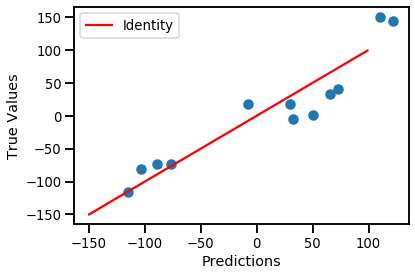

In [65]:
plt.scatter(svr_prediction, y_test)
plt.plot(np.arange(-150,100),np.arange(-150,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {svr_r2:.6f}')
print(f'MAE: {svr_mse:.6f}')
print(f'MSE: {svr_mae:.6f}')

In [66]:
results_df = results_df.append({'Model':'SVR',
                                'Features':'Linear',
                                'R2':svr_r2,
                                'MSE':svr_mse,
                                'MAE':svr_mae},ignore_index=True)

# Polynomical SVR

In [67]:
#Definimos estimador
svr = SVR(kernel='rbf',max_iter=25000)
parameters_svrp = {'C' : [500,1000,1500,2000],
              'epsilon' : [0.001, 0.01,1,100],
             'gamma':[0.01,0.1, 10,100]}
# GS
gs3_pol = GridSearchCV(svr, param_grid=parameters_svrp, cv=n_folds, scoring="neg_mean_squared_error",
                  n_jobs=5,verbose=3,refit=True)
gs3_pol.fit(x_train_poly_scaled, y_train)
print(gs3_pol.best_estimator_, "\n")
print(gs3_pol.best_params_, "\n")
print(gs3_pol.best_score_, "\n")

Fitting 7 folds for each of 64 candidates, totalling 448 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    1.9s


SVR(C=1500, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.01,
    kernel='rbf', max_iter=25000, shrinking=True, tol=0.001, verbose=False) 

{'C': 1500, 'epsilon': 0.01, 'gamma': 0.01} 

-4067.265208247277 



[Parallel(n_jobs=5)]: Done 421 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 439 out of 448 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 448 out of 448 | elapsed:    2.6s finished


In [68]:
# Prediccion + Metricas
poly_svr_prediction = gs3_pol.best_estimator_.predict(x_test_poly_scaled)
poly_svr_r2 = r2_score(y_true=y_test, y_pred=poly_svr_prediction)
poly_svr_mse = mean_squared_error(y_true=y_test, y_pred=poly_svr_prediction)
poly_svr_mae = mean_absolute_error(y_true=y_test, y_pred=poly_svr_prediction)

R2 score: 0.469743
MAE: 3413.890079
MSE: 46.987019


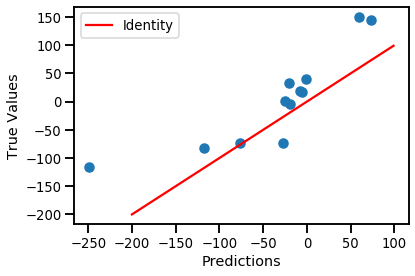

In [69]:
#Plot
plt.scatter(poly_svr_prediction, y_test)
plt.plot(np.arange(-200,100),np.arange(-200,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_svr_r2:.6f}')
print(f'MAE: {poly_svr_mse:.6f}')
print(f'MSE: {poly_svr_mae:.6f}')

In [70]:
#Guardamos
results_df = results_df.append({'Model':'SVR',
                                'Features':'Poly',
                                'R2':poly_svr_r2,
                                'MSE':poly_svr_mse,
                                'MAE':poly_svr_mae},ignore_index=True)

# Linear KNN

In [71]:
# Ahora cambiamos el estimador, usaremos KNN
knn=KNeighborsRegressor()
# Lista del parametro lambda (parametro 'alpha')
parameters_k = np.arange(2,5,10)
parameters_knn = [{'n_neighbors': parameters_k}]
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs4_lin = GridSearchCV(knn, param_grid=parameters_knn,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)
# Entrenamos
gs4_lin.fit(x_train_scaled, y_train)

Fitting 7 folds for each of 1 candidates, totalling 7 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   7 | elapsed:    1.4s remaining:    0.5s
[Parallel(n_jobs=3)]: Done   7 out of   7 | elapsed:    1.4s finished


GridSearchCV(cv=7, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=3,
             param_grid=[{'n_neighbors': array([2])}], pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [72]:
print(gs4_lin.best_estimator_, "\n")
print(gs4_lin.best_params_, "\n")
print(gs4_lin.best_score_, "\n")

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform') 

{'n_neighbors': 2} 

-4574.01075 



R2 score: 0.257296
MAE: 4781.666042
MSE: 56.454167


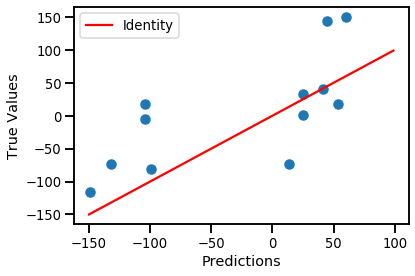

In [73]:
# Prediccion + Metricas
knn_prediction = gs4_lin.best_estimator_.predict(x_test_scaled)
knn_r2 = r2_score(y_true=y_test, y_pred=knn_prediction)
knn_mse = mean_squared_error(y_true=y_test, y_pred=knn_prediction)
knn_mae = mean_absolute_error(y_true=y_test, y_pred=knn_prediction)
plt.scatter(knn_prediction, y_test)
plt.plot(np.arange(-150,100),np.arange(-150,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {knn_r2:.6f}')
print(f'MAE: {knn_mse:.6f}')
print(f'MSE: {knn_mae:.6f}')

In [74]:
results_df = results_df.append({'Model':'KNN',
                                'Features':'Linear',
                                'R2':knn_r2,
                                'MSE':knn_mse,
                                'MAE':knn_mae},ignore_index=True)

# Polynomical KNN

In [75]:
#Definimos estimador
knn=KNeighborsRegressor()
#Defini
gs4_pol = GridSearchCV(knn, param_grid=parameters_knn,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
gs4_pol.fit(x_train_poly_scaled, y_train)
print(gs4_pol.best_estimator_, "\n")
print(gs4_pol.best_params_, "\n")
print(gs4_pol.best_score_, "\n")

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform') 

{'n_neighbors': 2} 

-5151.419464285714 



R2 score: 0.339980
MAE: 4249.325625
MSE: 54.854167


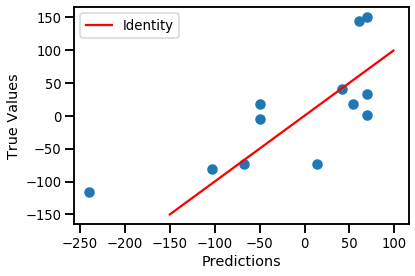

In [76]:
# Prediccion + Metricas
poly_knn_prediction = gs4_pol.best_estimator_.predict(x_test_poly_scaled)
poly_knn_r2 = r2_score(y_true=y_test, y_pred=poly_knn_prediction)
poly_knn_mse = mean_squared_error(y_true=y_test, y_pred=poly_knn_prediction)
poly_knn_mae = mean_absolute_error(y_true=y_test, y_pred=poly_knn_prediction)
# Plots
plt.scatter(poly_knn_prediction, y_test)
plt.plot(np.arange(-150,100),np.arange(-150,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_knn_r2:.6f}')
print(f'MAE: {poly_knn_mse:.6f}')
print(f'MSE: {poly_knn_mae:.6f}')

In [77]:
results_df = results_df.append({'Model':'KNN',
                                'Features':'Poly',
                                'R2':poly_knn_r2,
                                'MSE':poly_knn_mse,
                                'MAE':poly_knn_mae},ignore_index=True)

# Linear Random Forest

In [78]:
# Ahora cambiamos el estimador, usaremos Rand forest
rf= RandomForestRegressor()
# Lista del parametro lambda (parametro 'alpha')
param_rf = np.arange(50,300,10)
parameters_rf = {'n_estimators': [100, 200, 300]}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs5_lin = GridSearchCV(rf, param_grid=parameters_rf, refit=True, cv=5,scoring='neg_mean_squared_error',n_jobs=5)
# Entrenamos
gs5_lin.fit(x_train_scaled, y_train)
print(gs5_lin.best_estimator_,)
print(gs5_lin.best_params_, "\n")
print(gs5_lin.best_score_, "\n")

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
{'n_estimators': 100} 

-5824.990040404764 



R2 score: 0.604055
MAE: 2549.168706
MSE: 44.301917


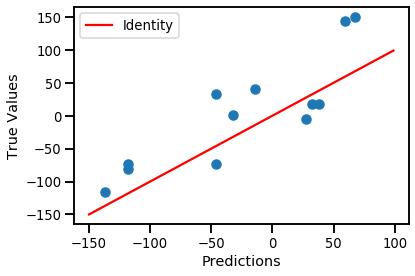

In [79]:
# Prediccion + Metricas
rf_prediction = gs5_lin.best_estimator_.predict(x_test_scaled)
rf_r2 = r2_score(y_true=y_test, y_pred=rf_prediction)
rf_mse = mean_squared_error(y_true=y_test, y_pred=rf_prediction)
rf_mae = mean_absolute_error(y_true=y_test, y_pred=rf_prediction)
plt.scatter(rf_prediction, y_test)
plt.plot(np.arange(-150,100),np.arange(-150,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {rf_r2:.6f}')
print(f'MAE: {rf_mse:.6f}')
print(f'MSE: {rf_mae:.6f}')

In [80]:
results_df = results_df.append({'Model':'Rand Forest',
                                'Features':'Linear',
                                'R2':rf_r2,
                                'MSE':rf_mse,
                                'MAE':rf_mae},ignore_index=True)

# Polynomical Random Forest

In [81]:
#Definimos estimador
rf= RandomForestRegressor()
#Defini
gs5_pol = GridSearchCV(rf, param_grid=parameters_rf,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
gs5_pol.fit(x_train_poly_scaled, y_train)
print(gs5_pol.best_estimator_, "\n")
print(gs5_pol.best_params_, "\n")
print(gs5_pol.best_score_, "\n")

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

{'n_estimators': 300} 

-8432.510066550796 



R2 score: 0.501638
MAE: 3208.546448
MSE: 44.565528


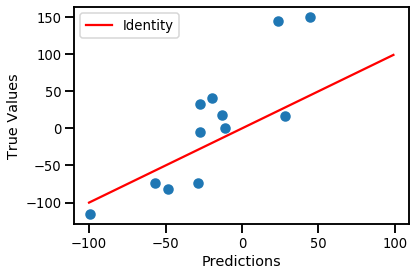

In [82]:
# Prediccion + Metricas
poly_rf_prediction = gs5_pol.best_estimator_.predict(x_test_poly_scaled)
poly_rf_r2 = r2_score(y_true=y_test, y_pred=poly_rf_prediction)
poly_rf_mse = mean_squared_error(y_true=y_test, y_pred=poly_rf_prediction)
poly_rf_mae = mean_absolute_error(y_true=y_test, y_pred=poly_rf_prediction)
# Plots
plt.scatter(poly_rf_prediction, y_test)
plt.plot(np.arange(-100,100),np.arange(-100,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_rf_r2:.6f}')
print(f'MAE: {poly_rf_mse:.6f}')
print(f'MSE: {poly_rf_mae:.6f}')

In [83]:
results_df = results_df.append({'Model':'Rand Forest',
                                'Features':'Poly',
                                'R2':poly_rf_r2,
                                'MSE':poly_rf_mse,
                                'MAE':poly_rf_mae},ignore_index=True)

# Mostramos Resultados

In [84]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Para acotar los decimales en pandas
display(results_df)

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.581,2696.887,42.530
1,Linear,Poly,-0.338,8612.234,71.249
2,Ridge,Lineal,0.599,2582.574,40.321
3,Ridge,Poly,0.572,2756.345,41.059
4,SVR,Linear,0.877,792.869,24.364
5,SVR,Poly,0.470,3413.890,46.987
6,KNN,Linear,0.257,4781.666,56.454
7,KNN,Poly,0.340,4249.326,54.854
8,Rand Forest,Linear,0.604,2549.169,44.302
9,Rand Forest,Poly,0.502,3208.546,44.566


In [85]:
# Con claridad se ve que el mejor modelo de regresión para nuestro caso es el SVR lineal, ya que destaca con un buen valor de R2 y una considerable diferencia con respecto a los MSE y MAE del resto de modelos #
# Vemos que todos los modelos poseen altos valores de MSE, esto tiene sentido, ya que es un valor sensible ante malas predicciones y está tratando con un dataset con datos con alta variabilidad #